<h3>Analyst: Tricia C. Serna</h3>

In [36]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Datasets/Titanic.csv') 

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [40]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [42]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7272727272727273


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

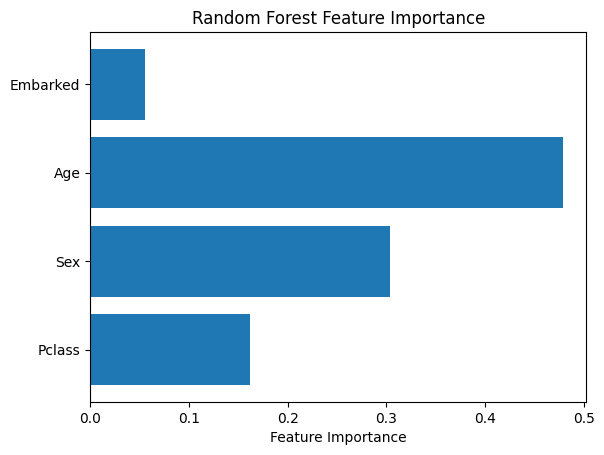

In [43]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


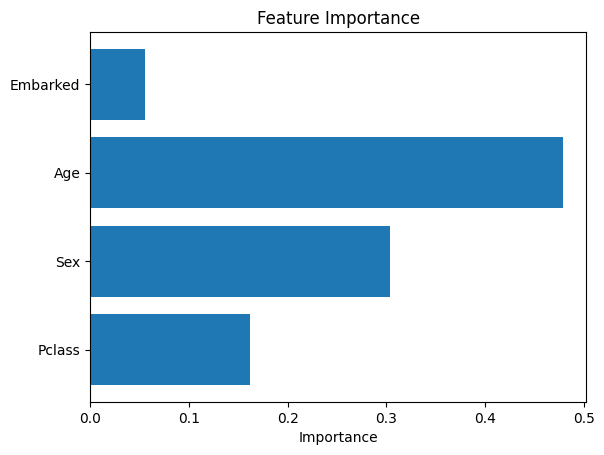

In [44]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

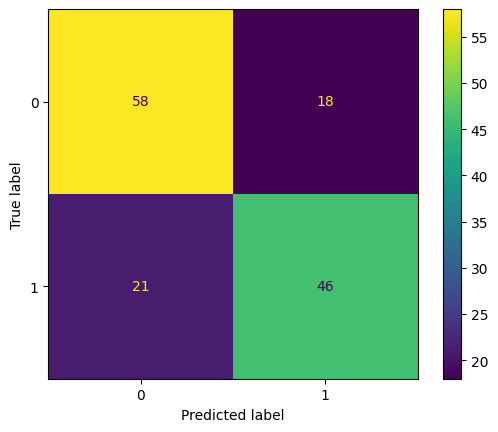

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1> Manual Testing </h1>

In [65]:
passenger = [[2, 1, 70.0, 12.5, 1]]
desc = "2nd Class Female, Age 70, Embarked=C"

prediction = model.predict(passenger)[0]
print(f"{desc}")

if prediction == 1:
    print("Prediction: Survived (1)")
else:
    print("Prediction: Unlikely (0)")

2nd Class Female, Age 70, Embarked=C
Prediction: Survived (1)


<h3>Insight: passenger's Gender advantage is powerful enough to overcome both the risk of old age and the lack of a 1st Class ticket. While her Age (70) is a negative factor and her 2nd Class standing is not the highest priority, the single, overwhelming factor of being a woman is sufficient. The model's primary rule, "women must be saved," holds true, ensuring that neither advanced age nor economic class prevents her survival prediction.</h3>

<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [55]:
df2 = pd.read_csv("Datasets/Titanic.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age","Fare" ,"Embarked"]]

# Drop missing values
df2 = df2.dropna()


In [57]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [58]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [59]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>selecting X and y </h1>

In [60]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [61]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7808988764044944


<h1> Manual Testing </h1>

In [64]:
passengers = {
    "1: Child Male (2nd Class, Age 10, Medium Fare)": [2, 0, 10.0, 20.0, 0],
    "2: Elderly Woman (3rd Class, Female, Age 70, Low Fare)": [3, 1, 70.0, 8.0, 2],
    "3: Standard Risk Male (1st Class, Male, Age 20, High Fare)": [1, 0, 40.0,150.0 , 0]
}

for desc, features in passengers.items():
    prediction = model.predict([features])[0]
    
    if prediction == 1:
        print(f"{desc} → Likely to survive ")
    else:
        print(f"{desc} → Unlikely to survive")

1: Child Male (2nd Class, Age 10, Medium Fare) → Unlikely to survive
2: Elderly Woman (3rd Class, Female, Age 70, Low Fare) → Unlikely to survive
3: Standard Risk Male (1st Class, Male, Age 20, High Fare) → Unlikely to survive


<h3> Insight 1 : The penalty for being a Male and only having a 2nd Class ticket (medium fare) was severe enough to negate the child survival advantage. In this particular fit, the positive weight from Age 10 was overridden by the combination of gender and the lack of a high-fare ticket, indicating the model expects only the most privileged children to survive.</h3>

<h3>Insight 2 : This result is highly unexpected and reveals a strong, combined penalty for Extreme Age and Poverty. While the model still recognizes Gender (Female) as a survival advantage, it finds that the negative impact of being Elderly (70) combined with 3rd Class/Low Fare risk creates a score that falls just below the survival threshold. The model is prioritizing the risk factors of age and logistics over gender for this specific, vulnerable cohort.</h3>

<h3>Insight 3 : The Gender Risk is so profound that it overrides even extreme wealth. This passenger is an adult man, which carries the highest negative weight in the model. Even though the High Fare ($150.0) and 1st Class status provide the maximum positive weight, the model determines that Gender (Male) remains the dominant factor. The strict historical evacuation policy—where lifeboat access was prioritized away from non-essential adult males—makes the prediction default to perishing, despite his financial status..</h3>